In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#do plotting inline instead of in a seperate window.
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\dhala\\Desktop\\Coursera\\ML-Week3\\ex2\\ex2data1.txt",names =['exam1','exam2','Result'])
df.shape
df.head(2)

,exam1,exam2,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0


In [3]:
#positive = df[df['result'].isin([1])]
#negative = df[df['result'].isin([0])]
positive = df[df['Result'] == 1]
negative = df[df['Result'] == 0]



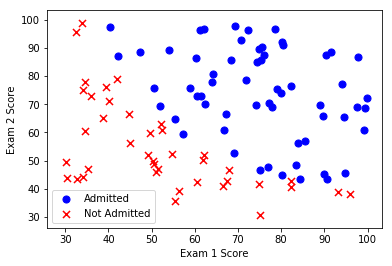

In [4]:
fig, ax = plt.subplots()

ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [5]:
df['Name'] = 1
data = {'Bias':df['Name'],'exam1':df['exam1'],'exam2':df['exam2'],'Result':df['Result']}
df = pd.DataFrame(data)
X = df.as_matrix(columns = ['Bias','exam1','exam2'])
y = df.as_matrix(columns = ['Result'])
initial_theta = np.zeros((X.shape[1],1))

In [6]:
def sigmoid(Z):
    return 1/(1+ np.exp(-Z))

In [7]:
def h(X,Theta):
    return sigmoid(np.dot(X,Theta))
    

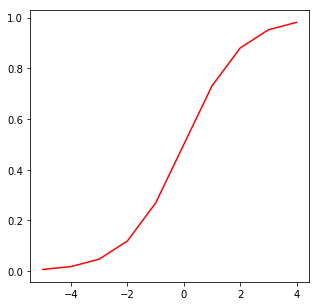

In [8]:
nums = np.arange(-5,5, step=1)
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(nums, sigmoid(nums), 'r')

In [9]:
def costFunction(Theta,X,y):
    m = y.size
    h = sigmoid(np.dot(X,Theta))
    J = -1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
    return J[0]

cost = costFunction(initial_theta, X, y)
print(cost)

[ 0.69314718]


In [48]:
def gradientDescent(x,y,Theta,num_iters=1000000):
    alpha=0.01
    m = y.size
    J_history = np.zeros(num_iters)
    for iter in  np.arange(num_iters):      
        h = sigmoid(np.dot(X,Theta))
        Theta = Theta - alpha*(1/m)* (x.T.dot(h-y))
        #print(Theta)
        J_history[iter]= costFunction(Theta,x,y)
    return Theta, J_history

def gradient(theta, X, y):
    m = y.size
    h = sigmoid(np.dot(X,theta))
    grad =(1/m)*X.T.dot(h-y)
    return(grad.flatten())

grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)




Cost: 
 [ 0.69314718]
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


In [49]:
NewTheta ,Cost_J = gradientDescent(X, y,initial_theta)
print(NewTheta)
#print(Cost_J)

C:\Users\dhala\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in log


[[-59.19416873]
 [  0.4971051 ]
 [  0.48979838]]


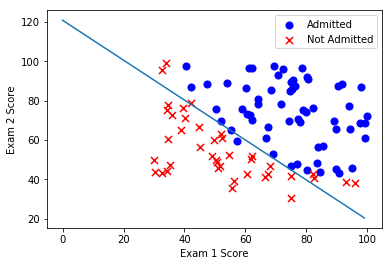

In [52]:
xx = np.arange(100, 100)
lineplot = [(-NewTheta[0]-NewTheta[1]*x)/NewTheta[2] for x in range(100)]


fig, ax = plt.subplots()

ax.scatter(positive['exam1'], positive['exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['exam1'], negative['exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
#plt.plot(xx,fit,c='b')
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.plot(lineplot)
